In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import style
style.use('seaborn')
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=10,5
import warnings
warnings.filterwarnings('ignore')

print('modules imported!')

modules imported!


In [4]:
#readin the dataset
df=pd.read_csv('/Users/brenden/Downloads/pdf/DATASETS/Supermart Grocery Sales.csv')
print('Done!')

Done!


In [5]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [6]:
#check the size of the dataset
df.shape

(9994, 11)

In [7]:
#Get information about the datatypes ,shape and names of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [8]:
#Get the descriptive statisticsof the data
df.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


In [9]:
#Check for any missing values
df.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [10]:
#check for duplicated data
df.duplicated().sum()

0

In [11]:
#change column names to lowercase to make it easier to work with
df.columns=df.columns.str.lower()

### Business problems to be solved  using this dataset:

1.Sales Performance Analysis.Which categories has the most sales, & which ones are underperforming?

2.Regional Market Analysis.Which region are experiencing more sales and which ones are lagging?

3.Which 5 cities have the highest sales & profit?

4.Profit Margin Analysis.Do the sales significantly impact the profit?

5.Discount Rate Analysis.Does the discount have any effect on profit?

6.Yearly sales performance per region.

7.Yearly profit per category.Which category performed the best & which ones didn't?

<h3> 1.Sales Performance Analysis

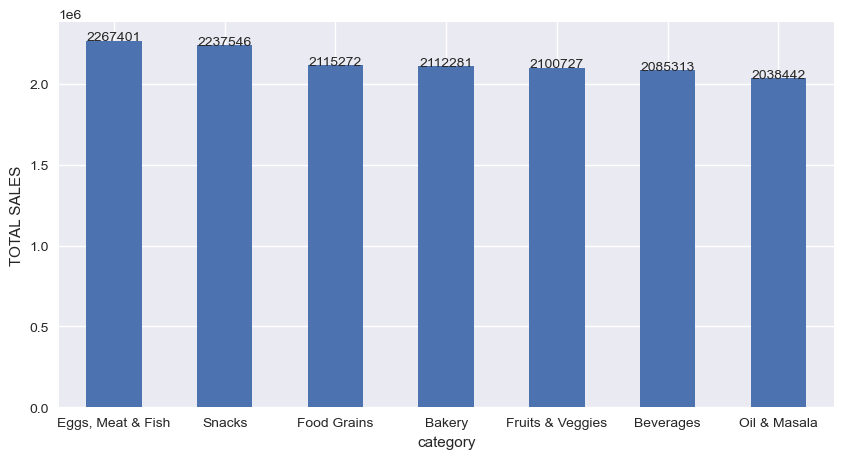

In [12]:
cat_sales=df.groupby('category')['sales'].sum()
sorted_cat_sales=cat_sales.sort_values(ascending=False)
sorted_cat_sales.plot(kind='bar')
plt.ylabel('TOTAL SALES')
plt.xticks(rotation=0,ha='center')
for i, v in enumerate(sorted_cat_sales):
    plt.text(i, v + 0.1, str(v), ha='center')

plt.show()

### Inference:

- We can clearly see that the Eggs, Meat & Fish category out performed the rest of the categories with a total of $2267401 sales, this could be attributed to its various sub categories which provides a wide range  of options therefore maximizing sales.

- Oil & Masala category is the one with the least sales totaling $2038442 of this could also be to the limited range of sub categories.

<h3> 2.Regional Sales Analysis

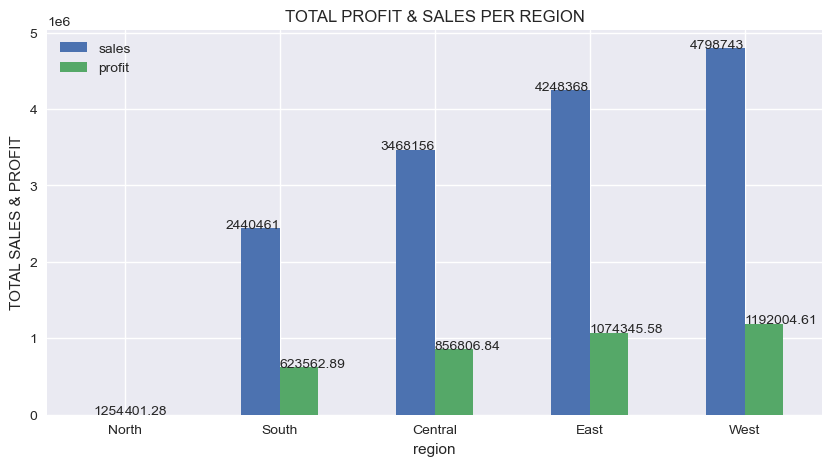

In [13]:
reg_sales=df.groupby('region').agg({'sales':'sum','profit':'sum'}).reset_index()
sorted_reg_sales=reg_sales.sort_values(by='sales',ascending=True)
sorted_reg_sales.set_index('region',inplace=True)
sorted_reg_sales.plot(kind='bar')
plt.title('TOTAL PROFIT & SALES PER REGION')
plt.ylabel('TOTAL SALES & PROFIT')
plt.xticks(rotation=0,ha='center')
for i, v in enumerate(sorted_reg_sales['sales']):
    plt.text(i, v + 0.1, str(v), ha='right')
    
for i, v in enumerate(sorted_reg_sales['profit']):
    plt.text(i, v + 0.1, str(v), ha='left')    

plt.show()

### Inference:
- The North region has the least sales & profit while the West region has the most sales & is the most profitable. The West region's profitability is attributed to the high discount it gives which encourages more sales there resulting in more profit.

<h3> 3.Top 5 cities exceling in sales & profit

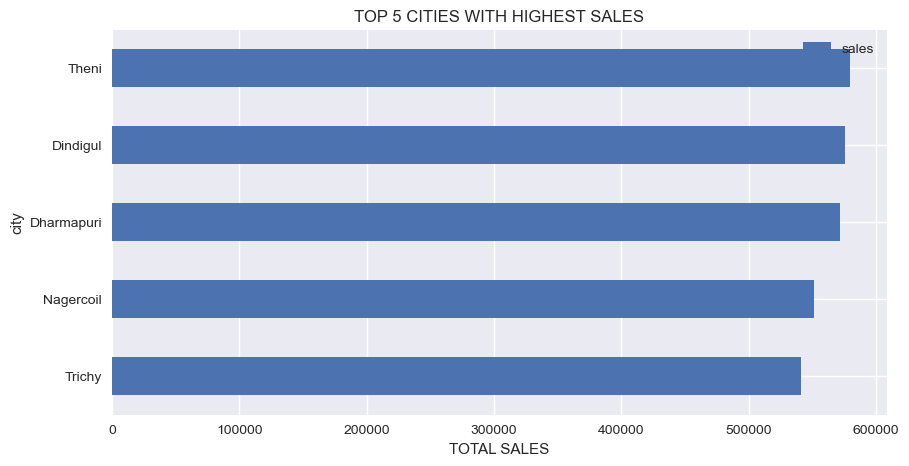

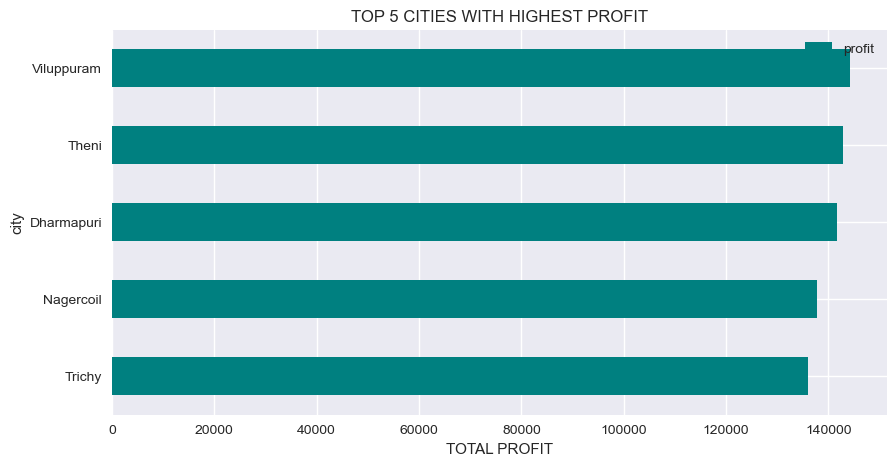

In [14]:
city_sales = df.groupby('city').agg({'sales':'sum'}).reset_index()

sorted_city_sales = city_sales.sort_values(by='sales',ascending=True)
sorted_city_sales.set_index('city',inplace=True)
sorted_city_sales.head(5).plot(kind ='barh')
plt.xlabel('TOTAL SALES')
plt.title('TOP 5 CITIES WITH HIGHEST SALES')

city_profit = df.groupby('city').agg({'profit':'sum'}).reset_index()
sorted_city_profit = city_profit.sort_values(by='profit',ascending=True)
sorted_city_profit.set_index('city',inplace=True)
sorted_city_profit.head(5).plot(kind ='barh',color='teal')
plt.xlabel('TOTAL PROFIT')
plt.title('TOP 5 CITIES WITH HIGHEST PROFIT')

plt.show()

- <h3> 4.Profit Margin Analysis

<Axes: >

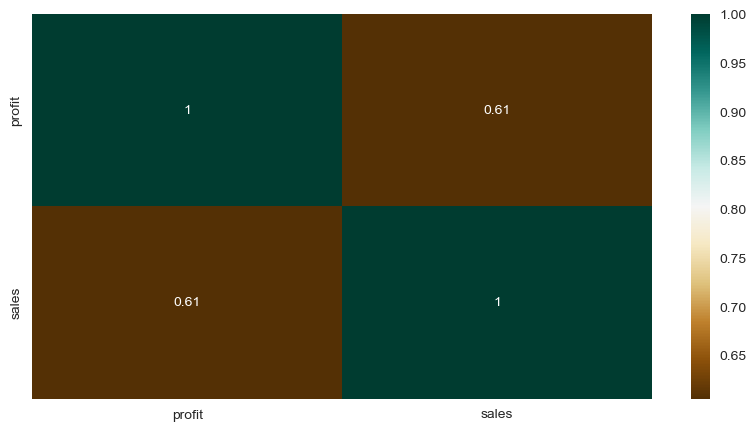

In [15]:
profit=df[['profit','sales']].corr()
sns.heatmap(profit,cmap='BrBG',annot=True)

### Inference:

- Theres relatively strong positive correlation between sales & profit.This is why an increase in sales will inherently result in an increase in profit

- <h3> 5.Discount Analysis

In [16]:
discount=df.groupby('region').agg({'sales':'sum','profit':'sum','discount':'sum'}).reset_index()
sorted_discount=discount.sort_values(by='discount',ascending=False)
sorted_discount.set_index('region',inplace=True)
sorted_discount

,sales,profit,discount
region,,,
West,4798743,1192004.61,719.80
East,4248368,1074345.58,648.41
Central,3468156,856806.84,531.33
South,2440461,623562.89,367.15
North,1254,401.28,0.12


<Axes: ylabel='discount'>

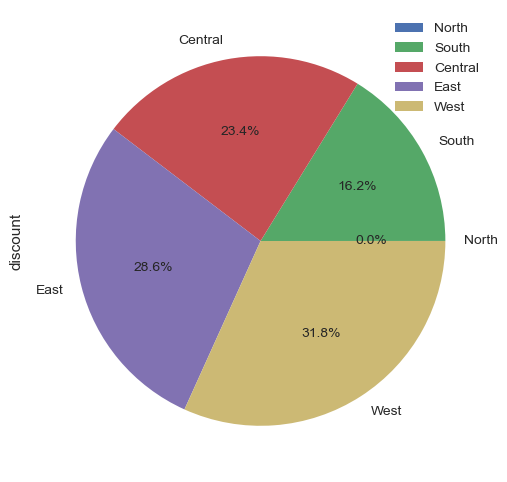

In [28]:
reg_dis=df.groupby('region')['discount'].sum().reset_index()
sort_reg_dis= reg_dis.sort_values(by='discount',ascending=True)
sort_reg_dis.set_index('region',inplace=True)
sort_reg_dis.plot(kind='pie',y='discount',autopct= '%1.1f%%',figsize=(14,6))

### Inference:

- Despite giving the least discount amount out of all the regions, the North region has a few sales resulting in the insignificant profit.Inversely the West region has the highest discount amount but due to the large number of sales it made it accumulated the most profit

<h4> 6.Sales Performance Per Sub Category

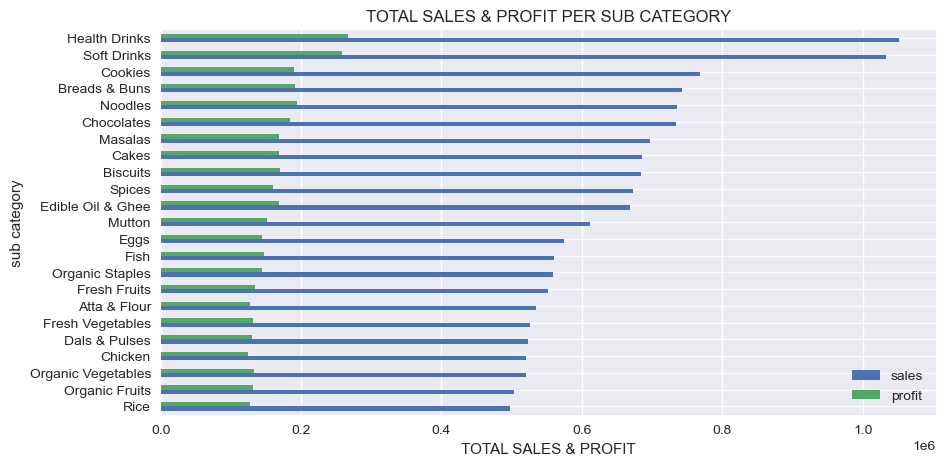

In [42]:
subcat_sales=df.groupby('sub category').agg({'sales':'sum','profit':'sum'}).reset_index()
sorted_subcat_sales=subcat_sales.sort_values(by=['sales','profit'])
sorted_subcat_sales.set_index('sub category',inplace=True)
sorted_subcat_sales.plot(kind='barh')
plt.xlabel('TOTAL SALES & PROFIT')
plt.title('TOTAL SALES & PROFIT PER SUB CATEGORY')
plt.show()



### Inference:

- On a sub category level  beverages performed the best

<h4> 7.Yearly Sales Performance Per Region

In [40]:
df['year']=pd.to_datetime(df['order date']).dt.year

<Axes: xlabel='year'>

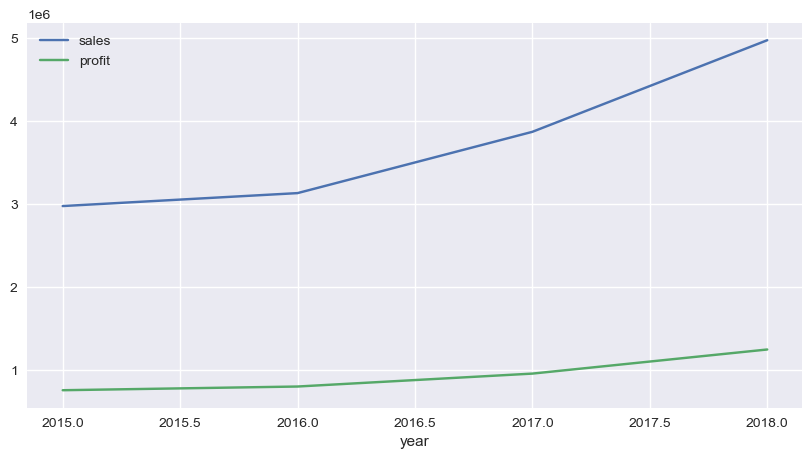

In [41]:
yearly_sales=df[['year','sales','profit']]
grp=yearly_sales.groupby('year').agg({'sales':'sum','profit':'sum'}).reset_index()
sort_grp=grp.sort_values(by='sales',ascending=True)
sort_grp.set_index('year',inplace=True)
sort_grp.plot(kind='line')


### Inference:

- Sales & profit have been steadily increase over the years